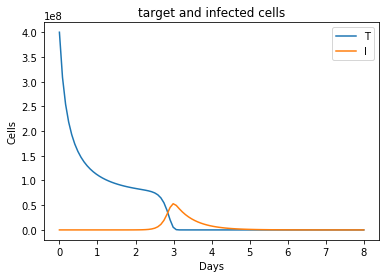

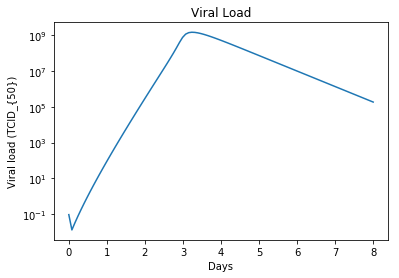

In [137]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters
pV = 210; 
beta = 5e-7; 
betap = 3e-8;
V0 = 1e+4; 
I0 = 0
T0 = 7e+7; 
gT = 0.8;
deltaV = 5; 
deltaI = 2;

time = np.linspace(0,8,100)
y_init = [4e+8, 0, 9.3e-2]

# TIV differential equations
def TIV(t, y): 
    T,I,V = y
    return [gT * T * (1 - (T+1)/T0) - (betap * V * T), 
            betap * T * V - (deltaI * I), 
            pV * I - (deltaV * V) - (beta * V * T)]

# Solve TIV
sol = solve_ivp(TIV, [time[0], time[-1]], y_init, method = 'RK45', t_eval = time)

# Plot
fig1, ax1 = plt.subplots()
ax1.plot(sol.t,sol.y[0],sol.t,sol.y[1])
ax1.set_title("target and infected cells")
ax1.set_xlabel("Days")
ax1.set_ylabel("Cells")
ax1.legend(('T','I'))

fig2, ax2 = plt.subplots()
ax2.plot(sol.t,sol.y[2])
ax2.set_title('Viral Load')
ax2.set_xlabel("Days")
ax2.set_ylabel("Viral load (TCID_{50})")
ax2.set_yscale('log')

plt.show()

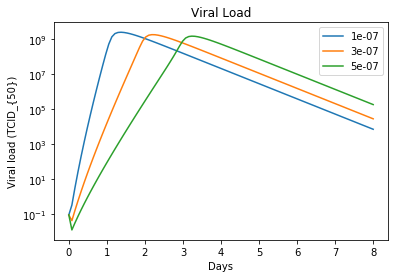

In [136]:
fig3, ax3 = plt.subplots()

# sltns = [beta, x, y]
sltns = []

for i in beta_values:
    beta = i
    # Solve TIV
    sol = solve_ivp(TIV, [time[0], time[-1]], y_init, method = 'RK45', t_eval = time)
    
    # Storing values
    sltn = (beta, sol.t, sol.y[2])   
    sltns.append(sltn)
    
    # Plotting values
    ax3.plot(sol.t, sol.y[2])

ax3.set_title('Viral Load')
ax3.set_xlabel("Days")
ax3.set_ylabel("Viral load (TCID_{50})")
ax3.set_yscale('log')
ax3.legend((legend))

plt.show()

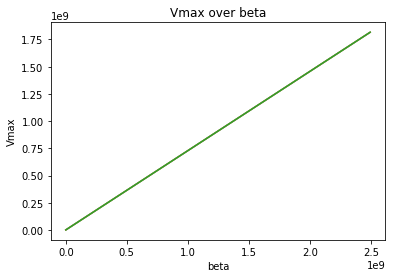

In [138]:
# Extract Vmax

# Create storage for Vmax values
Vmax_vals = []

# Extract Vmax and store in Vmax_vals as (beta, Vmax)
for i in sltns:
    beta = i[0]
    Vmax = np.amax(i[2])
    Vmax_vals.append((beta, Vmax))

# Plot Vmax against beta
fig3, ax4 = plt.subplots()
for i in Vmax_vals:   
    ax4.plot(Vmax_vals[0], Vmax_vals[1])

ax4.set_title('Vmax over beta')
ax4.set_xlabel('beta')
ax4.set_ylabel('Vmax')
plt.show()

In [ ]:
# Vmax - Find Vmax, plot Vmax against beta, do again with parameter p

# Time of Vmax
# Surface plot, extract data